In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True, 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'RealWaste',  # Path to your dataset folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'RealWaste',  # Path to your dataset folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3497 images belonging to 9 classes.
Found 872 images belonging to 9 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2

def create_model():
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(9, activation='softmax')
    ])

    return model

# Instantiate and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,588,233 (9.87 MB)

 Trainable params: 330,249 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # You can adjust the number of epochs
)

C:\Users\Hasan\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 300s 3s/step - accuracy: 0.4269 - loss: 1.6885 - val_accuracy: 0.6285 - val_loss: 1.0310
Epoch 2/10
  1/109 ━━━━━━━━━━━━━━━━━━━━ 50s 464ms/step - accuracy: 0.6250 - loss: 1.3180

C:\Users\Hasan\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 1.3180 - val_accuracy: 0.3750 - val_loss: 1.7248
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.6873 - loss: 0.9020 - val_accuracy: 0.6956 - val_loss: 0.8513
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.5515 - val_accuracy: 0.5000 - val_loss: 1.4104
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.7255 - loss: 0.7998 - val_accuracy: 0.6782 - val_loss: 0.8899
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.9234 - val_accuracy: 0.6250 - val_loss: 0.8284
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7422 - loss: 0.7265 - val_accuracy: 0.6736 - val_loss: 0.8869
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.4634 - val_accuracy: 0.6250 - val_loss: 1.2074
Epoch 9/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.7746 - loss: 0.6430 - val_accuracy: 0.6817 - 

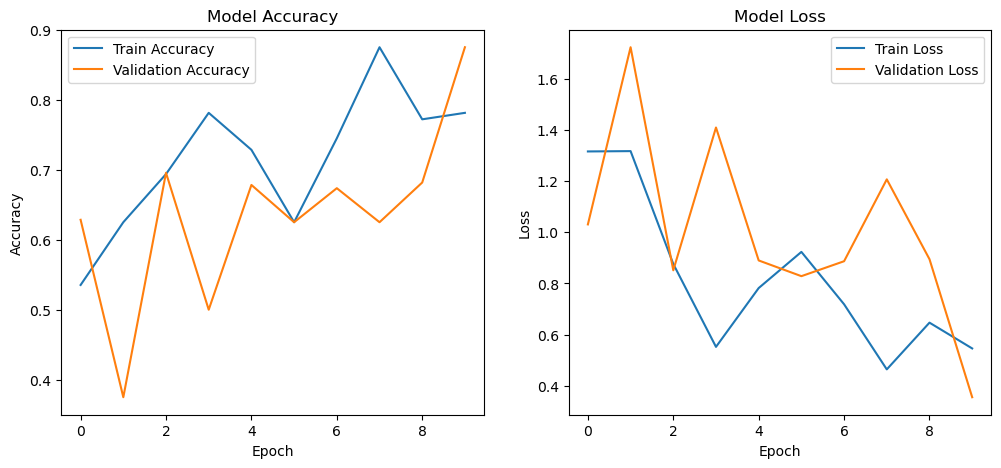

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [9]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}, Validation Loss: {val_loss:.2f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7169 - loss: 0.8359
Validation Accuracy: 0.70, Validation Loss: 0.86


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


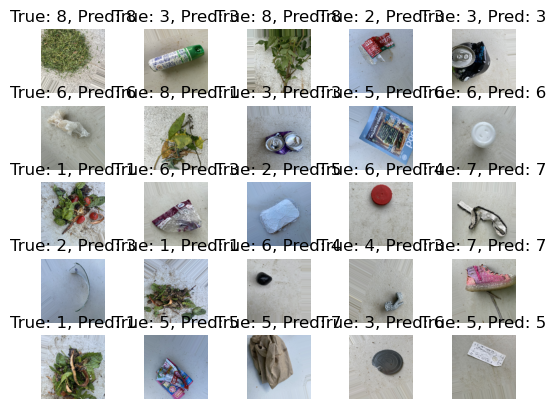

In [10]:
import numpy as np

# Get a batch of validation data
x_val, y_val = next(validation_generator)

# Make predictions
predictions = model.predict(x_val)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Display the results
for i in range(25):  # Show 25 examples
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_val[i])  # Show image
    plt.title(f'True: {true_classes[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')

plt.show()